## RED WINE QUALITY DATA PREPROCESSING 🍷
Bu notebookta veri ön işleme (data preprocessing) yaparak aykırı gözlem ve eksik veri gibi makine öğrenmesi modelimizin performansını kötü yönde etkileyebilecek olan sorunları çözmeye çalışacağız. Amacımız veri setini dengeli bir hale getirip makine öğrenmesi modellerinin daha yüksek başarım vermesini sağlamaktır.

In [3]:
# gerekli kütüphaneler
import numpy as np  # sayısal işlemler 
import pandas as pd  # veri manipülasyonu 
import seaborn as sns  # görselleştirme
import matplotlib.pyplot as plt  # görselleştirme

# görsel çıktılardaki uyarı mesajları için
import warnings 
warnings.filterwarnings("ignore")

In [4]:
# verinin wine değişkenine yüklenmesi
wine = pd.read_csv('winequality-red.csv')

In [5]:
df = wine.copy()

## Veri Temizleme (Data Cleaning)
+ Gürültülü Veri (Noisy Data) $\to$ yanlış/bozuk veriler
+ Eksik Veri Analizi (Missing Data Analysis) 
+ Aykırı Değer Analizi (Outlier Analysis)

### Aykırı Değer Analizi
Aykırı gözlem, veride normalin önemli ölçüde dışında olan nadir noktalara denir. 

Aykırı gözlemler, 
+ Verilerin dağılımını ve betimsel istatistiklerini etkilerler.
+ Makine öğrenmesi modellerinin sonuçlarına olumsuz yönde etki edebilirler.
+ İstatistiksel testlerin gücünü azaltabilirler.

#### Aykırı Gözlemlerin Tanımlanması
> #### IQR Metodu

<img src="https://miro.medium.com/v2/resize:fit:1400/0*Rpd3tQj-kUpwObeA" width="700" height="300">


In [6]:
df_residual_sugar = df['residual sugar']

In [7]:
df_residual_sugar.head()

0    1.9
1    2.6
2    2.3
3    1.9
4    1.9
Name: residual sugar, dtype: float64

<Axes: xlabel='residual sugar'>

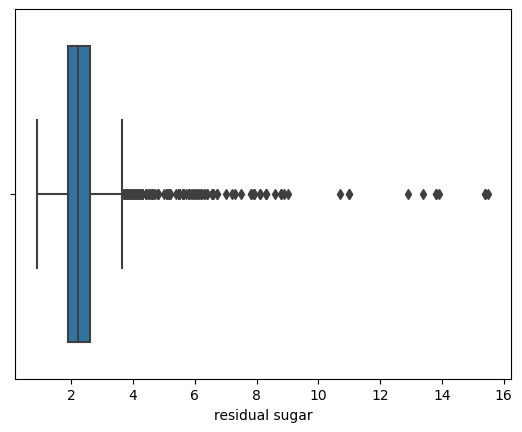

In [8]:
sns.boxplot(x = df_residual_sugar)

<Axes: ylabel='Density'>

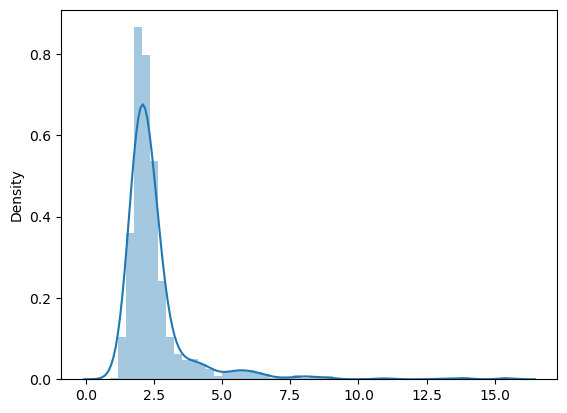

In [9]:
sns.distplot(x = df_residual_sugar)

In [ ]:
# sınır değer belirleme, eşik değer belirleme
Q1 = df_residual_sugar.quantile(0.25)
Q3 = df_residual_sugar.quantile(0.75)
IQR = Q3 - Q1

In [11]:
print(Q1, Q3, IQR)

1.9 2.6 0.7000000000000002


In [12]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

In [13]:
print(alt_sinir, ust_sinir)

0.8499999999999996 3.6500000000000004


In [14]:
(df_residual_sugar < alt_sinir)  | (df_residual_sugar > ust_sinir)

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: residual sugar, Length: 1599, dtype: bool

In [15]:
aykiri_tf = (df_residual_sugar > ust_sinir)
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: residual sugar, dtype: bool

In [16]:
df_residual_sugar[aykiri_tf].values

array([ 6.1 ,  6.1 ,  3.8 ,  3.9 ,  4.4 , 10.7 ,  5.5 ,  5.9 ,  5.9 ,
        3.8 ,  5.1 ,  4.65,  4.65,  5.5 ,  5.5 ,  5.5 ,  5.5 ,  7.3 ,
        7.2 ,  3.8 ,  5.6 ,  4.  ,  4.  ,  4.  ,  4.  ,  7.  ,  4.  ,
        4.  ,  6.4 ,  5.6 ,  5.6 , 11.  , 11.  ,  4.5 ,  4.8 ,  5.8 ,
        5.8 ,  3.8 ,  4.4 ,  6.2 ,  4.2 ,  7.9 ,  7.9 ,  3.7 ,  4.5 ,
        6.7 ,  6.6 ,  3.7 ,  5.2 , 15.5 ,  4.1 ,  8.3 ,  6.55,  6.55,
        4.6 ,  6.1 ,  4.3 ,  5.8 ,  5.15,  6.3 ,  4.2 ,  4.2 ,  4.6 ,
        4.2 ,  4.6 ,  4.3 ,  4.3 ,  7.9 ,  4.6 ,  5.1 ,  5.6 ,  5.6 ,
        6.  ,  8.6 ,  7.5 ,  4.4 ,  4.25,  6.  ,  3.9 ,  4.2 ,  4.  ,
        4.  ,  4.  ,  6.6 ,  6.  ,  6.  ,  3.8 ,  9.  ,  4.6 ,  8.8 ,
        8.8 ,  5.  ,  3.8 ,  4.1 ,  5.9 ,  4.1 ,  6.2 ,  8.9 ,  4.  ,
        3.9 ,  4.  ,  8.1 ,  8.1 ,  6.4 ,  6.4 ,  8.3 ,  8.3 ,  4.7 ,
        5.5 ,  5.5 ,  4.3 ,  5.5 ,  3.7 ,  6.2 ,  5.6 ,  7.8 ,  4.6 ,
        5.8 ,  4.1 , 12.9 ,  4.3 , 13.4 ,  4.8 ,  6.3 ,  4.5 ,  4.5 ,
        4.3 ,  4.3 ,

In [17]:
ort = df_residual_sugar.mean()

In [18]:
df_residual_sugar[aykiri_tf] = ort

<Axes: xlabel='residual sugar'>

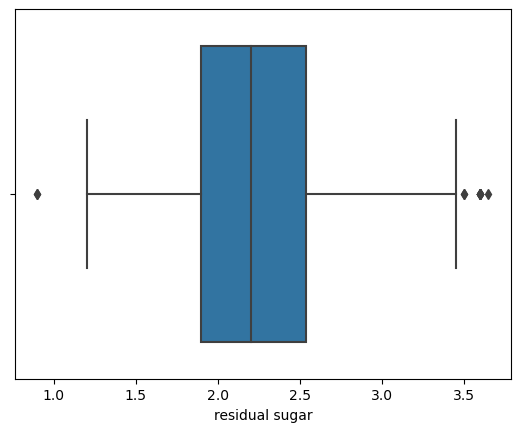

In [19]:
sns.boxplot(x = df_residual_sugar)

<Axes: ylabel='Density'>

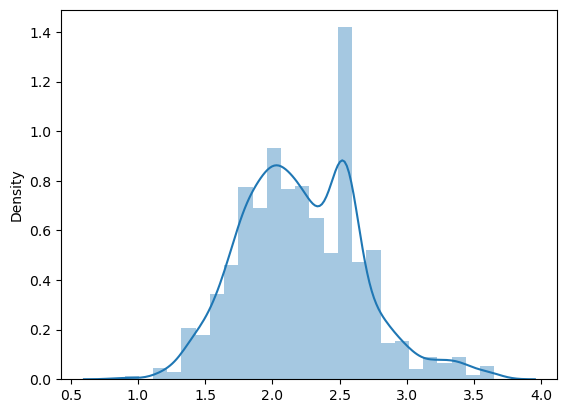

In [20]:
sns.distplot(x = df_residual_sugar)

In [21]:
df['residual sugar'] = df_residual_sugar 

### Residual Sugar

In [ ]:
df_residual_sugar = df['residual sugar']
# sınır değer belirleme, eşik değer belirleme
Q1 = df_residual_sugar.quantile(0.25)
Q3 = df_residual_sugar.quantile(0.75)
IQR = Q3 - Q1
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR
(df_residual_sugar < alt_sinir)  | (df_residual_sugar > ust_sinir)
aykiri_tf = (df_residual_sugar > ust_sinir)
ort = df_residual_sugar.mean()
df_residual_sugar[aykiri_tf] = ort
df['residual sugar'] = df_residual_sugar 

### Fixed Acidity

In [4]:
df_fixed_acidity = df['fixed acidity']
# sınır değer belirleme, eşik değer belirleme
Q1 = df_fixed_acidity.quantile(0.25)
Q3 = df_fixed_acidity.quantile(0.75)
IQR = Q3 - Q1
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR
aykiri_tf = (df_fixed_acidity > ust_sinir)
ort = df_fixed_acidity.mean()
df_fixed_acidity[aykiri_tf] = ort
df['fixed acidity'] = df_fixed_acidity 

### Chlorides

In [5]:
df_chlorides = df['chlorides']
# sınır değer belirleme, eşik değer belirleme
Q1 = df_chlorides.quantile(0.25)
Q3 = df_chlorides.quantile(0.75)
IQR = Q3 - Q1
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR
aykiri_tf = (df_chlorides > ust_sinir)
ort = df_chlorides.mean()
df_chlorides[aykiri_tf] = ort
df['chlorides'] = df_chlorides 

### Free Sulfur Dioxide

In [2]:
df_free_sulfur_dioxide = df['free sulfur dioxide']
# sınır değer belirleme, eşik değer belirleme
Q1 = df_free_sulfur_dioxide.quantile(0.25)
Q3 = df_free_sulfur_dioxide.quantile(0.75)
IQR = Q3 - Q1
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR
aykiri_tf = (df_free_sulfur_dioxide > ust_sinir)
df_free_sulfur_dioxide[aykiri_tf] = ust_sinir
df['free sulfur dioxide'] = df_free_sulfur_dioxide 

### Sulphates

In [3]:
df_sulphates = df['sulphates']
# sınır değer belirleme, eşik değer belirleme
Q1 = df_sulphates.quantile(0.25)
Q3 = df_sulphates.quantile(0.75)
IQR = Q3 - Q1
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR
aykiri_tf = (df_sulphates > ust_sinir)
df_sulphates[aykiri_tf] = ust_sinir
df['sulphates'] = df_sulphates 

In [7]:
def kalite_degeri(deger):
    deger = str(deger) 
    if deger == '3':
        deger = deger.replace('3','zayif')
        return deger
    elif deger == '4':
        deger = deger.replace('4','zayif')
        return deger
    elif deger == '5':
        deger = deger.replace('5','orta')
        return deger
    elif deger == '6':
        deger = deger.replace('6','orta')
        return deger
    elif deger == '7':
        deger = deger.replace('7','yuksek')
        return deger
    elif deger == '8':
        deger = deger.replace('8','yuksek')
        return deger
    
df['quality']=df['quality'].apply(kalite_degeri)

### Temizlenmiş Veriyi Kaydet

In [19]:
df.to_csv("redwine-clean.csv")